# IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

IMPORTAMOS SKLEARN

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# CARGAMOS EL DATASET

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.isna().sum().sum()

0

ANALISIS DE CORRELACIÓN

In [4]:
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV']
cols

['DIS', 'INDUS', 'CRIM', 'RM', 'MEDV']

<Axes: >

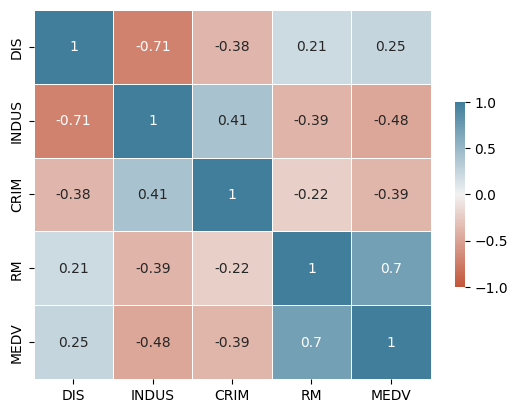

In [5]:
sns.heatmap(
    data=df[cols].corr(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

<Axes: xlabel='INDUS', ylabel='MEDV'>

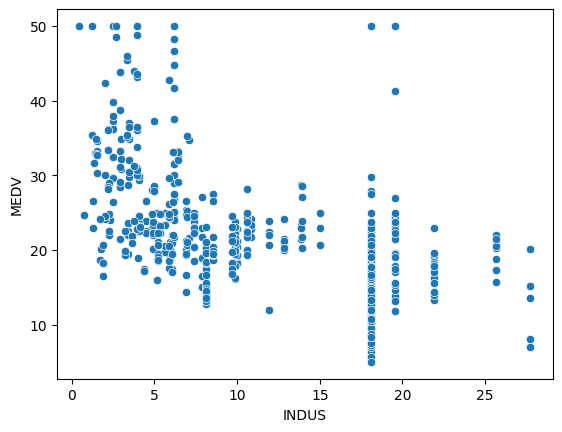

In [6]:
sns.scatterplot(data=df,x=df.INDUS,y=df.MEDV)

# CREANDO EL MODELO DE REGRESIÓN CON SCIKIT-LEARN

X = RM : promedio de habitaciones de un departamento
Y = MEDV : valor promedio del departamento

## ESTANDARIZAMOS LOS DATOS PARA EL MODELO

In [14]:
X = df[['RM','INDUS']].values
y = df['MEDV'].values.reshape(-1, 1)

print(X)
print(y)


[[ 6.575  2.31 ]
 [ 6.421  7.07 ]
 [ 7.185  7.07 ]
 ...
 [ 6.976 11.93 ]
 [ 6.794 11.93 ]
 [ 6.03  11.93 ]]
[[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]
 [28.7]
 [22.9]
 [27.1]
 [16.5]
 [18.9]
 [15. ]
 [18.9]
 [21.7]
 [20.4]
 [18.2]
 [19.9]
 [23.1]
 [17.5]
 [20.2]
 [18.2]
 [13.6]
 [19.6]
 [15.2]
 [14.5]
 [15.6]
 [13.9]
 [16.6]
 [14.8]
 [18.4]
 [21. ]
 [12.7]
 [14.5]
 [13.2]
 [13.1]
 [13.5]
 [18.9]
 [20. ]
 [21. ]
 [24.7]
 [30.8]
 [34.9]
 [26.6]
 [25.3]
 [24.7]
 [21.2]
 [19.3]
 [20. ]
 [16.6]
 [14.4]
 [19.4]
 [19.7]
 [20.5]
 [25. ]
 [23.4]
 [18.9]
 [35.4]
 [24.7]
 [31.6]
 [23.3]
 [19.6]
 [18.7]
 [16. ]
 [22.2]
 [25. ]
 [33. ]
 [23.5]
 [19.4]
 [22. ]
 [17.4]
 [20.9]
 [24.2]
 [21.7]
 [22.8]
 [23.4]
 [24.1]
 [21.4]
 [20. ]
 [20.8]
 [21.2]
 [20.3]
 [28. ]
 [23.9]
 [24.8]
 [22.9]
 [23.9]
 [26.6]
 [22.5]
 [22.2]
 [23.6]
 [28.7]
 [22.6]
 [22. ]
 [22.9]
 [25. ]
 [20.6]
 [28.4]
 [21.4]
 [38.7]
 [43.8]
 [33.2]
 [27.5]
 [26.5]
 [18.6]
 [19.3]
 [20.1]
 [19.5]
 [19.5]
 [20.4]
 [19.8]
 [19.4]
 [21.7]
 [22

In [16]:
sc_x = StandardScaler()
sc_y = StandardScaler()

X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

print(X_std)
print(y_std)

[[ 0.41367189 -1.2879095 ]
 [ 0.19427445 -0.59338101]
 [ 1.28271368 -0.59338101]
 ...
 [ 0.98496002  0.11573841]
 [ 0.72567214  0.11573841]
 [-0.36276709  0.11573841]]
[[ 0.15968566]
 [-0.10152429]
 [ 1.32424667]
 [ 1.18275795]
 [ 1.48750288]
 [ 0.6712218 ]
 [ 0.03996443]
 [ 0.49708184]
 [-0.65659542]
 [-0.39538548]
 [-0.81985164]
 [-0.39538548]
 [-0.09064054]
 [-0.23212926]
 [-0.47157171]
 [-0.286548  ]
 [ 0.06173193]
 [-0.54775795]
 [-0.25389676]
 [-0.47157171]
 [-0.97222411]
 [-0.31919924]
 [-0.79808414]
 [-0.87427038]
 [-0.75454915]
 [-0.93957286]
 [-0.64571167]
 [-0.84161913]
 [-0.44980422]
 [-0.16682677]
 [-1.07017784]
 [-0.87427038]
 [-1.0157591 ]
 [-1.02664285]
 [-0.98310786]
 [-0.39538548]
 [-0.27566425]
 [-0.16682677]
 [ 0.23587189]
 [ 0.89978051]
 [ 1.34601416]
 [ 0.4426631 ]
 [ 0.30117438]
 [ 0.23587189]
 [-0.14505928]
 [-0.35185049]
 [-0.27566425]
 [-0.64571167]
 [-0.88515413]
 [-0.34096674]
 [-0.30831549]
 [-0.22124551]
 [ 0.26852314]
 [ 0.09438317]
 [-0.39538548]
 [ 1.40

## CREO EL MODELO DE REGRESIÓN LINEAL

In [19]:
slr = LinearRegression()
slr.fit(X_std,y_std)
slr.predict(X_std)

array([[ 0.56875214],
       [ 0.26424288],
       [ 0.9146611 ],
       [ 0.93360172],
       [ 1.0604503 ],
       [ 0.45004472],
       [-0.11309575],
       [ 0.02311749],
       [-0.43745352],
       [-0.11990641],
       [ 0.19764071],
       [-0.11564974],
       [-0.21780967],
       [-0.17656565],
       [-0.05141974],
       [-0.27446892],
       [-0.18848431],
       [-0.14166101],
       [-0.5962727 ],
       [-0.36556152],
       [-0.49922076],
       [-0.16294433],
       [-0.01225843],
       [-0.2923469 ],
       [-0.19784897],
       [-0.47453211],
       [-0.2923469 ],
       [-0.09313504],
       [ 0.28826203],
       [ 0.44065059],
       [-0.37748018],
       [-0.07185172],
       [-0.17571432],
       [-0.38769617],
       [-0.05141974],
       [-0.11077085],
       [-0.18909346],
       [-0.18143147],
       [-0.08267687],
       [ 0.56246397],
       [ 0.92768572],
       [ 0.56718672],
       [ 0.05553573],
       [ 0.09129171],
       [-0.02959754],
       [-0

# GRAFICAMOS LOS RESULTADOS

In [20]:
from mpl_toolkits.mplot3d import Axes3D

x1_range = np.arange(df['RM'].min(),df['RM'].max())
x2_range = np.arange(df['INDUS'].min(),df['INDUS'].max())
print(x1_range)
print(x2_range)

[3.561 4.561 5.561 6.561 7.561 8.561]
[ 0.46  1.46  2.46  3.46  4.46  5.46  6.46  7.46  8.46  9.46 10.46 11.46
 12.46 13.46 14.46 15.46 16.46 17.46 18.46 19.46 20.46 21.46 22.46 23.46
 24.46 25.46 26.46 27.46]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


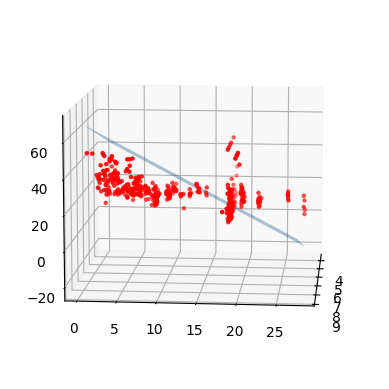

In [23]:
X1,X2 = np.meshgrid(x1_range,x2_range)

plano = pd.DataFrame({'RM':X1.ravel(),'INDUS':X2.ravel()})
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

ax.plot_surface(X1,X2,pred,alpha=0.4)
ax.scatter3D(df['RM'],df['INDUS'],df['MEDV'],color='red',marker='.')
ax.view_init(elev=10,azim=5)

plt.show()

PROBANDO PREDICCIONES

In [25]:
num_habitaciones = 5
ratio_industrias = 10
num_habitaciones_industrias_std = sc_x.transform(np.array([num_habitaciones,ratio_industrias]).reshape(1,-1))
print("EL PRECIO DE UN DPTO CON 5 HABITACIONES Y UN RATIO DE INDUSTRIAS DE 10 ES DE :",sc_y.inverse_transform(slr.predict(num_habitaciones_industrias_std)))

EL PRECIO DE UN DPTO CON 5 HABITACIONES Y UN RATIO DE INDUSTRIAS DE 10 ES DE : [[12.86482095]]
